# Regresión Logística orientado a redes neuronales

En este cuaderno vamos a construir un clasificador de regresión logística para reconocer gatos. Este ejercicio te guiará paso a paso como construir una red de manera manual.

**Instrucciones:**
- No uses bucles (for/while) en tu código, a menos que las instrucciones lo indiquen explícitamente.

**Objetivos:**
- Contruir una red neuronal paso a paso:
    1. Inicialización de los parámetros
    2. Cálculo la función de costo y su gradiente
    3. Uso de un algoritmo de optimización (descenso por gradiente).
    
## 1 - Paquetes ##

Estos son los paquete que vamos a usar para este ejercicio.
- [numpy](www.numpy.org) es un paquete de uso general de cómputo científico.
- [h5py](http://www.h5py.org) es un paquete utilizado para crear y editar archivos en formato h5.
- [matplotlib](http://matplotlib.org) este paquete se usa para la graficación de los datos.
- [PIL](http://www.pythonware.com/products/pil/) y [scipy](https://www.scipy.org/) se utiliza para probar el modelo.


In [2]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

import sys
sys.path.append('/content/drive/MyDrive/AI_notebooks')


import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2 - Planteamiento del problema ##

Se te proporciona un conjunto de datos (train_catvnoncat.h5) que contiene:

- Un conjunto de entrenamiento de m_train imágenes etiquetadas como gato (y=1) o no gato (y=0).

- Un conjunto de prueba de m_test imágenes etiquetadas como gato o no gato.

- Cada imagen tiene forma (num_px, num_px, 3), donde 3 corresponde a los 3 canales (RGB). Por lo tanto, cada imagen es cuadrada (alto = num_px, ancho = num_px).

Vamos construir un algoritmo simple de reconocimiento de imágenes que pueda clasificar correctamente imágenes como gato o no gato.

Vamos a familiarizarnos con el conjunto de datos. Carga los datos ejecutando el siguiente código:

In [3]:
# Cargando datos (gato/no-gato)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Agregamos el sufijo "_orig" al conjunto de datos de imágenes (entrenamiento y prueba) porque vamos a preprocesarlos. Después del preprocesamiento, terminaremos con train_set_x y test_set_x (las etiquetas train_set_y y test_set_y no necesitan ningún preprocesamiento).

Cada línea de train_set_x_orig y test_set_x_orig es un arreglo que representa una imagen. Puedes visualizar un ejemplo ejecutando el siguiente código. Puedes modificar el valor del índice y volver a ejecutarlo para ver otras imágenes.

y = [1] es la foto de un cat


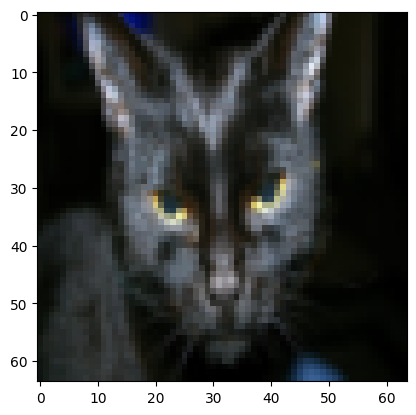

In [4]:
# Ejemplo de imagenes
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + " es la foto de un " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))

In [ ]:
### Escribe tu código aquí ### (≈ 3 líneas de código)
m_train =
m_test =
num_px =
### Fin ###

print ("Número de ejemplos de entrenamiento: m_train = " + str(m_train))
print ("Número de ejemplos de prueba: m_test = " + str(m_test))
print ("Alto/ancho de cada imagen: num_px = " + str(num_px))
print ("Cada imagen tienes dimensiones: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Número de ejemplos de entrenamiento: m_train = 209
Número de ejemplos de prueba: m_test = 50
Alto/ancho de cada imagen: num_px = 64
Cada imagen tienes dimensiones: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Salida esperada para m_train, m_test y num_px**:
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td>
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td>
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td>
  </tr>
  
</table>

Para generar la red neuronal debes de cambiar las dimensiones de las imágenes (num_px, num_px, 3) en un arreglo de NumPy con dimensiones (num_px * num_px * 3, 1). Después de esto, nuestro conjunto de entrenamiento y prueba será un arreglo de NumPy donde cada columna representa una imagen aplanada. Por lo que cada uno debe de contener m_train y m_test columans respectivamente.

Ejercicio: Remodela los conjuntos de datos de entrenamiento y prueba de manera que las imágenes de tamaño (num_px, num_px, 3) se aplanen en vectores individuales de forma (num_px * num_px * 3, 1).

**Tip:** Cuando quieres aplanar una matriz X de forma (a, b, c, d) a una matriz X_flatten de forma (b * c * d, a) puedes usar:
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [ ]:
### Escribe tu código aquí ### (≈ 2 líneas de código)
train_set_x_flatten = 
test_set_x_flatten = 
### Fin ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Salida esperada**:

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td>
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td>
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td>
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td>
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td>
  </tr>
</table>

Para representar imágenes a color, se deben especificar los canales rojo, verde y azul (RGB) para cada píxel, por lo que el valor de un píxel es en realidad un vector de tres números que van del 0 al 255.

Un paso común de preprocesamiento en aprendizaje automático es centrar y estandarizar el conjunto de datos, lo que significa restar la media de todo el arreglo de NumPy a cada ejemplo, y luego dividir cada ejemplo por la desviación estándar de todo el arreglo. Pero, para conjuntos de datos de imágenes, es más simple, más conveniente y funciona casi igual de bien simplemente dividir cada fila del conjunto de datos por 255 (el valor máximo de un canal de píxel).


In [7]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

## 3 - Arquitectura del algoritmo ##

La siguiente figura los pasos básicos para construir una red neuronal para clasificar imágenes de gatos.
<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Expresiones matemáticas**:

Para un ejemplo $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

La función de costo se calcula sumando sobre todos los ejemplos de entranamiento:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


    
## 4 - Partes del algoritmo ##

Los pasos principales para construir una red neuronal son:
1. Definir la estructura del modelo (por ejemplo, número de parámetros de entrada).
2. Incializar los paramétros del modelo.
3. Ciclo:
    - Calcular la perdida actual (forward propagation).
    - Calcular el gradiente actual (backward propagation).
    - Actualizar los páramentros (gradient descent)

Vamos a crear la función `model()` con estos pasos.

### 4.1 - Funciones auxilares

**Ejercicio**: Usando el código que implementaste en el ejercicio anterior crea la función `sigmoid()`, $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$. Usa la función np.exp().

In [ ]:
# Función sigmoide


import numpy as np

def sigmoid(x):
    """
    Calcula la función sigmoide.

    Argumentos:
    x -- escalar o vector de numpy.

    Salida:
    s -- sigmoid(x)
    """

    ### ESCRIBE TU CÓDIGO AQUÍ ### (≈ 1 línea de código)
    s = 
    ### FIN ###

    return s

In [9]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Salida esperada**:
<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td>
  </tr>
</table>

### 4.2 Inicialización de los parámetros

**Exercicio:** Implementa la función inicialización. Esta función crea un vector de ceros con dimensiones (dim, 1) para w e inicializa b con 0. Revisa la documentación de la función de numpy, np.zeros()

In [ ]:
def initialize_with_zeros(dim):
    """
    Crea un vector de ceros con dimensiones (dim, 1) para w e inicializa b a cero.

    Argumentos:
    dim -- Número de parámetros del modelo.

    Salidas:
    w -- vector con ceros de dimensiones (dim, 1)
    b -- Escalar (corresponde al bias)
    """

    ### Escribe tu código aquí ### (≈ 1 línea de código)
    w = 
    b = 
    ### Fin ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [11]:
dim = 2
w, b = initialize_with_zeros(dim)
print (f"w = {w}")
print (f"b = {b}")

w = [[0.]
 [0.]]
b = 0


**Salida esperada**:


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

Para las imagenes de entrada, w tendrá dimensiones de (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Propagación hacia adelante y hacia atras (forward and backward propagation)


**Ejercicio:** Implementar la función `propagate()` que calcula la función de costo y su gradiente.

**Tips:**:

Forward Propagation:
- Obtener X
- Calcular $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Calcular: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Estas son expresiones que vas a necesitar:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
def propagate(w, b, X, Y):
    """
    Calcula la función de costo y su gradiente

    Argumentos:
    w -- pesos, un arreglo de numpy con dimensiones (num_px * num_px * 3, 1).
    b -- bias, escalar.
    X -- datos con dimensiones (num_px * num_px * 3, número de ejemplos)
    Y -- Vector de etiquetas "label" vector (contiene 0 si no es un gato, y 1 si es un gato) de tamaño (1, número de ejemplos)

    Salida:
    cost -- salida de función de costo para la regresión lineal.
    dw -- gradiente de la función de pérdida con respecto a w (mismas dimensiones que w)
    db -- gradiente de la función de pérdida con respecto a b (mismas dimensiones que b)

    Tips:
    - Utiliza las siguientes funciones np.log(), np.dot()
    """

    m = X.shape[1]

    # FORWARD PROPAGATION
    ### Escribe tu código aquí ### (≈ 2 líneas de código)
    A =                           # calcula la función activación
    cost =                        # calcula la función de costo
    ### Fin ###

    # BACKWARD PROPAGATION (gradienteD)
    ### Escribe tu código aquí ### (≈ 2 líneas de código)
    dw = 
    db = 
    ### Fin ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [13]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Salida esperada**:

<table style="width:50%">
    <tr>
        <td> ** dw ** </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db ** </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 4.4 - Optimización

**Ejercicio:** Escribe la función de optimización. Este paso consiste en encontrar el conjunto de parámetros $w$ y $b$ que minimizan la función de costo $J$. Actulizaremos el parámetro $\theta$, con la siguiente regla $ \theta = \theta - \alpha \text{ } d\theta$, donde $\alpha$ es la taza de aprendizaje.

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    Esta función optimiza w y b mediante el algoritm e edcenso por gradiente.

    Argumentos:
    w -- pesos, arreglo de numpy con dimensiones (num_px * num_px * 3, 1)
    b -- bias, escalar
    X -- datos (num_px * num_px * 3, number of examples)
    Y -- Vector de etiquetas (es igual a 0 si no es un gato y 1 si es un gato), de dimensiones (1, número de ejemplos)
    num_iterations -- Número de iteraciones.
    learning_rate -- tasa de aprendizaje.
    print_cost -- Imprime la pérdida cada 100 iteraciones.

    Salidas:
    params -- Dicionario con los parámetros w y b.
    grads -- Diccionario con el gradiente de w, b con respecto a la función de costo.
    costs -- Lista de todos los costos calculados.

    Tips:
    En general  esta función consiste de dos pasos:
        1) Calcula el costo y el grdiente con los parámetros actuales. Usa propagate().
        2) Actualiza los parámetros usando el decenso por gradiente w y b.
    """

    costs = []

    for i in range(num_iterations):


        # Calculo del costo y su gradiente (≈ 1 línea de código)
        ### Escribe tu código aquí ###
        grads, cost = 
        ### Fin ###

        # Recupera las derivadas
        dw = grads["dw"]
        db = grads["db"]

        # Actualiza los parámetros (≈ 2 líneas de código)
        ### Escribe tu código aquí ###
        w = 
        b = 
        ### Fin ###

        # Guarda la función de costo
        if i % 100 == 0:
            costs.append(cost)

        # Imprime el valor de la función de costo cada 100 iteraciones
        if print_cost and i % 100 == 0:
            print ("Costo después de la iteración %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [15]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


**Salida esperada**:

<table style="width:50%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.19033591]
       [ 0.12259159]] </td>
    </tr>
    <tr>
       <td> **b** </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.67752042] [ 1.41625495]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.219194504541 </td>
    </tr>

</table>

**Ejercicio:** La función anterior generará los valores w y b aprendidos. Podemos usar estos valores de w y b para predecir las etiquetas de un conjunto de datos X. Completa la función `predict()`. El cálculo de las predicciones consta de dos pasos:

1. Calcula $\hat{Y} = A = \sigma(w^T X + b)$

2. Redondea la probabilidad de tus predicciones a cero si el valor de la función de activación es <= 0.5 y a 1 si activation > 0.5, guarda tus valores de predicción en la variable `Y_prediction`. Se pueden usar los coando `if`/`else` en un ciclo `for` aunque también se puede vectorizar.

In [ ]:
def predict(w, b, X):
    '''
    Predice el valor de las etiquetas usando regresión logísitcade los parámetros (w, b)

    Argumentos:
    w -- pesos, arreglo de numpy de dimensiones (num_px * num_px * 3, 1)
    b -- bias, escalar
    X -- datos (num_px * num_px * 3, number of examples)

    Salidas:
    Y_prediction -- vector de numpy (1/0) con las predicciones de los datos de entrada X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))


    # Calcula el vector "A" con las probabilidades de que la imágen sea un gato
    ### Escribe tu código aquí  ### (≈ 1 línea de código)
    A = 
    ### fin ###

    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### Escribe tu código aquí  ### (≈ 4 líneas de código)
        if (A[0,i] > 0.5):
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0

        ### Fin ###

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [17]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**Salida esperada**:

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>

## 5 - Integra todas las funciones en un modelos##

En esta sección vamos a integrar todas las funciones anteriores en un solo modelo.

**Ejercicio**: Implenta la función del modelo. Utiliza la siguiente notación: - Y_prediction_test para la predicción de tu conjunto de prueba- Y_prediction_train para las predicciones de tu conjunto de entrenamiento - w, costs, grads para las salidas de la función optimize()


In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Contruye un modelo de regresión lineal basado en las funciones que implementaste previamente.

    Argumentos:
    X_train -- Ejemplos de entrenamiento en un arreglo de numpy de dimensiones (num_px * num_px * 3, m_train)
    Y_train -- Etiquetas de entrenamiento en un vector de numpy de dimensiones (1, m_train)
    X_test -- Conjunto de prueba representado por un arreglo de numpy de dimensiones (num_px * num_px * 3, m_test)
    Y_test -- Etiquetas de prueba en un (vector) con dimensiones (1, m_test)
    num_iterations -- Número de iteraciones para optimizar los parámetros
    learning_rate -- Tasa de aprendizaje usado en la función optimize()
    print_cost -- Si es verdadero imprime el costo cada 100 iterations

    Salidas:
    d -- diccionario con la información del modelo.
    """

    ### Escribe tu código aquí ###

    # incializa los parámetros con ceros (≈ 1 línea de código)
    w, b =

    # Decenso por gradiente (≈ 1 línea de código)
    parameters, grads, costs =

    # Recupera los valores w y b del dicionario "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Calcula las predicciones para el conjunto de entrenamiento y prueba (train/test) (≈ 2 líneas de código)
    Y_prediction_test = 
    Y_prediction_train = 

    ### Fin ###

    # Imprime train/test errores
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Corre la siguiente línea para entrenar tu modelo

In [19]:
  d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


# **Salida esperada**:



<table style="width:40%">
    <tr>
        <td> <b>Cost after iteration 0</b> </td>
         <td> 0.693147 </td>
    </tr>
    <tr>
        <td> <center> $\vdots$ </center> </td>
        <td> <center> $\vdots$ </center> </td>
    </tr>
    <tr>
        <td> <b>Train Accuracy</b>  </td>
        <td> 99.04306220095694 % </td>
    </tr>
    <tr>
        <td><b>Test Accuracy</b></td>
        <td> 70.0 % </td>
    </tr>
</table>

**Nota** La precisión del entrenamiento es cercana al 100 %. Esto es un buen indicador de que tu modelo funciona y tiene la capacidad suficiente para ajustarse a los datos de entrenamiento. La precisión de la prueba es del 68 %. En realidad, es bastante razonable para un modelo tan simple y dado el pequeño conjunto de datos que usamos y que la regresión logística es un clasificador lineal.

Notarás que el modelo claramente está sobreajustando los datos de entrenamiento. Usando el siguiente código y modificando la variable de índice, puedes ver las predicciones en imágenes del conjunto de prueba.

y = 1, el modelo predice que la imágencat


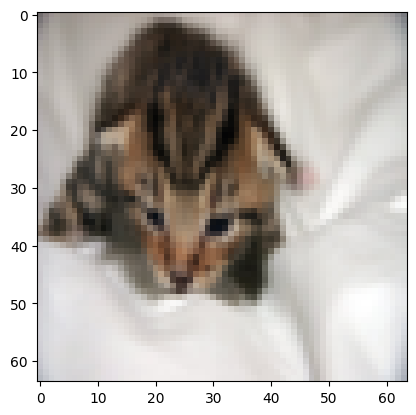

In [20]:
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) +  ", el modelo predice que la imágen"  + classes[int(d["Y_prediction_test"][0][index])].decode("utf-8"))

### Gráfica de la evolución de la función de costo

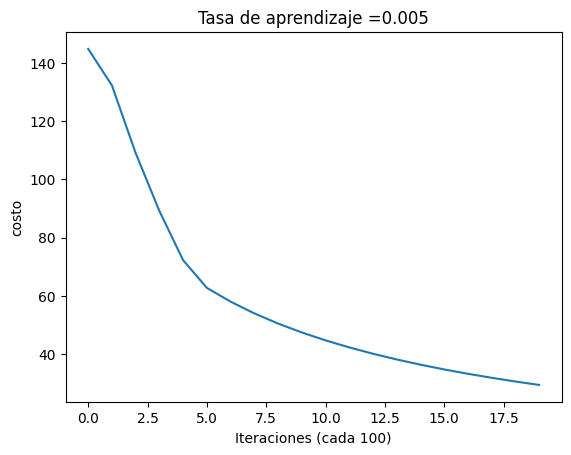

In [21]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('costo')
plt.xlabel('Iteraciones (cada 100)')
plt.title("Tasa de aprendizaje =" + str(d["learning_rate"]))
plt.show()

**Interpretación**:
Puedes ver una disminución del costo. Esto demuestra que se están aprendiendo los parámetros. Sin embargo, se observa que se podría entrenar el modelo aún más con el conjunto de entrenamiento. Intenta aumentar el número de iteraciones en la celda anterior y vuelva a ejecutar las celdas. Puedes observar que la precisión del conjunto de entrenamiento aumenta, pero la del conjunto de prueba disminuye. Esto se denomina sobreajuste.

## Análisis de los resultados

Para que el descenso por gradiente funcione, es necesario elegir la tasa de aprendizaje con cuidado. La tasa de aprendizaje $\alpha$ determina la rapidez con la que actualizamos los parámetros. Si la tasa de aprendizaje es demasiado alta, podríamos sobrepasar el valor óptimo. De igual manera, si es demasiado baja, necesitaremos demasiadas iteraciones para converger a los mejores valores. Por eso muy importante usar una tasa de aprendizaje bien ajustada.

Comparemos la curva de aprendizaje de nuestro modelo con varias opciones de tasas de aprendizaje. Ejecuta la siguiente celda. Esto toma aproximadamente 1 minuto. También puede probar con valores diferentes a los que usamos para inicializar la variable `learning_rates` y observa qué sucede.

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 66.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 66.98564593301435 %
test accuracy: 36.0 %

-------------------------------------------------------



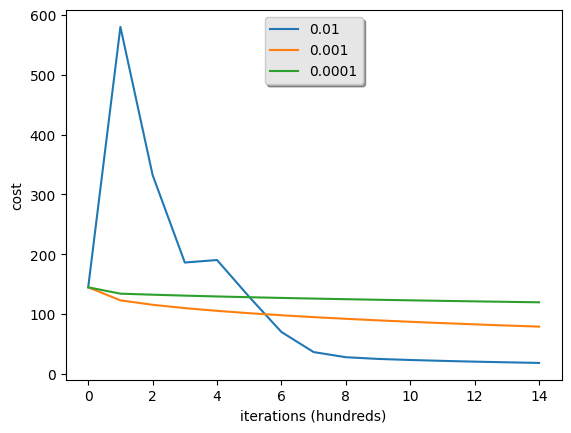

In [22]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretación**
Diferentes tasas de aprendizaje generan costos diferentes y, por lo tanto, predicciones diferentes.

Si la tasa de aprendizaje es demasiado alta (0,01), el costo puede oscilar e incluso puede divergir (en este ejemplo, usar 0,01 resulta ser un buen valor para el costo).

Un costo menor no implica un mejor modelo. Debes verificar si existe un posible sobreajuste, esto ocurre cuando la precisión del entrenamiento es mucho mayor que la precisión de la prueba.

En aprendizaje profundo, se recomienda:

Elegir la tasa de aprendizaje que minimice mejor la función de costo.


## Prueba tu propia imagen
Puedes probar tu modelo con alguna imagen propia o de Internet para verificar que tal clasifica imágenes que no ha visto previamente. Ten en cuenta que las imagen tendrá que ser submuestreada.


y = 0.0, el algoritmo predice que la imagen es "non-cat".


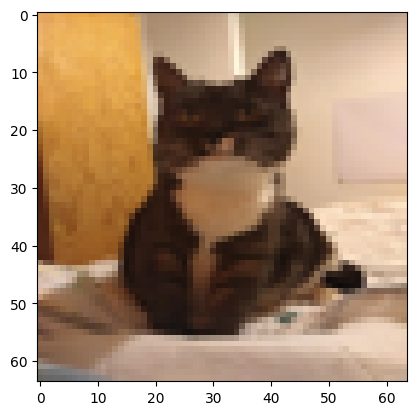

In [ ]:
## Escribe tu código aquí ## (escribe el nombre de tu imagen)
my_image = ""   # cambia el nombre del archivo
## Fin ##

# Procesa tu imagen.
fname = "images/" + my_image

image = np.array(Image.open('/content/drive/MyDrive/AI_notebooks/images/momo8.jpg').resize((num_px,num_px)))
image = image/255.
my_image = image.reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", el algoritmo predice que la imagen es \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\".")